In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# Ballistic Trajectories


## Basic Equations

$$ 
y(t) = (v_o \sin \theta) t  - 0.5gt^2
$$

$$ 
x(t) = (v_o \cos \theta) t
$$


$$ 
y(x) = (\tan \theta)x - \frac{g}{2(v_o \cos \theta)^2}x^2
$$


Time to reach the initial point in $y_0$:


$$
t_{end} = \frac{2(v_0 \sin \theta)}{g}
$$



$R$ is the horizontal range, and $y_{max}$ is the maximum height, hence: 


$$ 
R = \frac{{v_o}^2}{g}\sin 2 \theta
$$

$$
y_{max} = \frac{{v_o}^2}{2g}(\sin\theta)^2
$$

### Imports

### Constants

In [2]:
G = 9.8
thrown_ball_vo=42
mortar_vo=110

### Functions

In [3]:
def degree2rad(theta):
    return math.radians(theta)

def yt(t, theta, vo):
    car = vo*np.sin(degree2rad(theta))*t
    cdr = 0.5*G*np.power(t,2)
    return car - cdr


def xt(t, theta, vo):
    car = vo*np.cos(degree2rad(theta))*t
    return car


def y(x, theta, vo):
    car = np.tan(degree2rad(theta))*x
    num = G*np.power(x,2)
    dem = 2*np.power(vo*np.cos(degree2rad(theta)),2)
    cdr = num/dem
    return car - cdr


def time2yo(theta, vo):
    num = 2*vo*np.sin(degree2rad(theta))
    dem = G
    return num/dem


def R(theta, vo):
    car = np.power(vo,2)*np.sin(degree2rad(2*theta))
    return car/G

def ymax(theta, vo):
    car = np.power(vo,2)*np.power(np.sin(degree2rad(theta)),2)
    return car/(2*G)


def run_exp(theta, vo, num_t):
    end_t = time2yo(theta=theta, vo=vo)
    R_exp = R(theta=theta, vo=vo)
    ymax_exp = ymax(theta=theta, vo=vo)
    ts = np.linspace(0,end_t,num_t)
    xs = []
    ys = []
    for t in ts:
        x_t = xt(t, theta=theta, vo=vo)
        y_x = y(x_t, theta=theta, vo=vo)
        xs.append(x_t)
        ys.append(y_x)
    obs = np.array([ts,xs,ys]).T
    df = pd.DataFrame(obs, columns=["t", "x", "y"])
    df["t_final"] = end_t
    df["R"] = R_exp
    df["y_max"] = ymax_exp
    return df

### Experiment

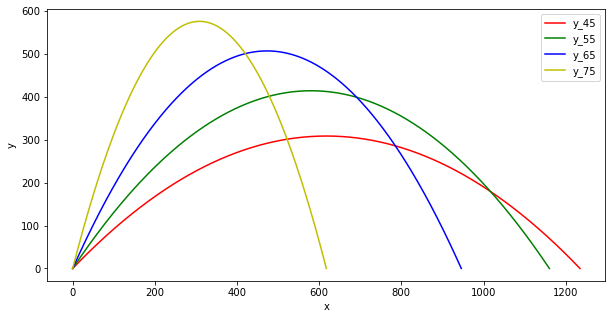

In [4]:
theta1 = 45
theta2 = 55
theta3 = 65
theta4 = 75
num_t = 600
v0 = mortar_vo

exp1 = run_exp(theta=theta1, vo=v0, num_t=num_t)
exp2 = run_exp(theta=theta2, vo=v0, num_t=num_t)
exp3 = run_exp(theta=theta3, vo=v0, num_t=num_t)
exp4 = run_exp(theta=theta4, vo=v0, num_t=num_t)

thetas = [theta1, theta2, theta3, theta4]
exps = [exp1, exp2, exp3, exp4]
colors = ["r", "g", "b", "y"]
figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)

for theta,exp,c in zip(thetas,exps, colors):
    suf = "_{}".format(theta)
    exp.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color=c);
plt.xlabel('x');
plt.ylabel('y');

### 100 simulations

### Consistency checks

In [5]:
for i,exp in enumerate(exps):
    y_check = np.abs(exp["y"].max() - exp["y_max"].mean())
    R_check = np.abs(exp["x"].iloc[-1] - exp["R"].mean())
    print("Exp {}\nymax_check={:.5f}\nR_check={:.5f}\n".format(i+1, y_check,R_check))


Exp 1
ymax_check=0.00086
R_check=0.00000

Exp 2
ymax_check=0.00115
R_check=0.00000

Exp 3
ymax_check=0.00141
R_check=0.00000

Exp 4
ymax_check=0.00161
R_check=0.00000



### Given $R$ and $v_0$ we can find the angle $\theta$ to hit a target in the $x$ axis

$$ 
\theta = 0.5* \arcsin \left(\frac{Rg}{{v_o}^2}\right)
$$


In [6]:
def get_theta(R,v0):
    round_value = np.round((R*G)/np.power(v0,2),5)
    return 0.5*math.degrees(np.arcsin(round_value))

In [7]:
v0 = mortar_vo
target_x = 824.125

theta = get_theta(target_x,v0)
exp = run_exp(theta=theta, vo=v0, num_t=num_t)

print("target = {:.2f}m | theta = {:.2f} degrees".format(target_x, theta))
print()
exp.tail()

target = 824.12m | theta = 20.94 degrees



,t,x,y,t_final,R,y_max
595,7.968031,818.617809,2.091419,8.021597,824.121122,78.823879
596,7.981422,819.993638,1.571201,8.021597,824.121122,78.823879
597,7.994814,821.369466,1.049225,8.021597,824.121122,78.823879
598,8.008206,822.745294,0.525491,8.021597,824.121122,78.823879
599,8.021597,824.121122,0.000000,8.021597,824.121122,78.823879


### Plots $R$ vs. $\theta$, and $y_{max}$ vs. $\theta$

In [8]:
v0 = mortar_vo
thetas = np.linspace(0,90,500)
Rs = []
ymaxs = []

for theta in thetas:
    R_exp = R(theta=theta, vo=v0)
    ymax_exp = ymax(theta=theta, vo=v0)
    Rs.append(R_exp)
    ymaxs.append(ymax_exp)

maximun: θ = 44.9 | R = 1234.7


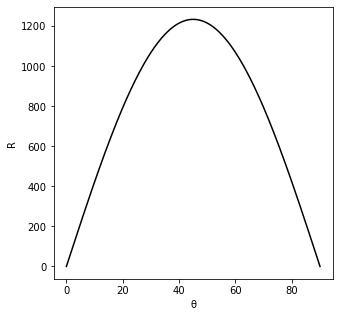

In [9]:
figsize = (5,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(thetas,Rs, color="k");
plt.xlabel('θ');
plt.ylabel('R');
i = np.argmax(Rs)
print("maximun: θ = {:.1f} | R = {:.1f}".format(thetas[i], Rs[i]))

maximun: θ = 90.0 | y_max = 617.3


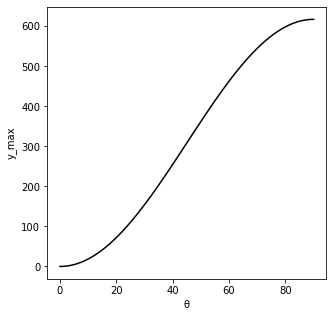

In [10]:
figsize = (5,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(thetas,ymaxs, color="k");
plt.xlabel('θ');
plt.ylabel('y_max');
i = np.argmax(ymaxs)
print("maximun: θ = {:.1f} | y_max = {:.1f}".format(thetas[i], ymaxs[i]))

### Given and object in $(x_1,y_1)$ can find the angle $\theta$ to hit it?

150 simulations

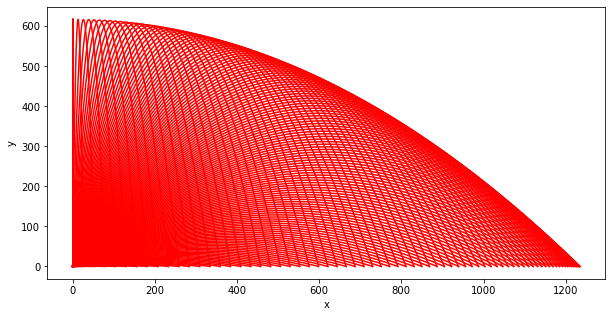

In [11]:
n_sim = 150
thetas = np.linspace(0,90,n_sim)
exps = [run_exp(theta=theta, vo=v0, num_t=num_t) for theta in thetas]
colors = ["r"]*n_sim

figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)

for theta,exp,c in zip(thetas,exps, colors):
    suf = "_{:.0f}".format(theta)
    exp.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color=c);
plt.xlabel('x');
plt.ylabel('y');
ax.get_legend().remove()